# Определение перспективного тарифа для телеком компании 

**Цель проекта** - определить тариф, который приносит больше денег компании "Мегалайн" 

## План выполнения работы:
* Изучение имеющихся данных
* Приведение данных к нужным типам
* Нахождение и исправление ошибок
* Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам
* Подсчет количества отправленных сообщений по месяцам
* Подсчет объема израсходованного интернет-трафика по месяцам
* Подсчет помесячной выручки с каждого пользователя
* Подсчет среднего количества, дисперсии и стандартного отклонения. Построение гистограммы
* Проверка гипотез
* Общий вывод

### Импорт бибилиотек

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

### Импорт и вывод данных

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
print('Звонки')
display(calls)
print('-----------------------------------')
print('Интернет')
display(internet)
print('-----------------------------------')
print('Сообщения')
display(messages)
print('-----------------------------------')
print('Тарифы')
display(tariffs)
print('-----------------------------------')
print('Пользователи')
display(users)

Звонки


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


-----------------------------------
Интернет


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


-----------------------------------
Сообщения


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


-----------------------------------
Тарифы


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


-----------------------------------
Пользователи


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Открыли данные, убедились, что всё было импортировано. 

## Описание данных

**Таблица users (информация о пользователях):**

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

**Таблица calls (информация о звонках):**

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со * 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Предобработка данных

### Звонки

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
calls = calls.loc[calls['duration'] != 0.00] #уберем нулевые значения из таблицы
calls['call_date'] = pd.DatetimeIndex(calls['call_date']).month
calls.rename(columns={'call_date': 'month'}, inplace=True)
def round(x):
    return int(math.ceil(x))
calls['duration'] = calls['duration'].apply(round)
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        162994 non-null  object
 1   month     162994 non-null  int64 
 2   duration  162994 non-null  int64 
 3   user_id   162994 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.2+ MB
None


- Перевели дату в спец формат для нее, оставили в виде месяца, т.к. дальше нам придется считать расходы\трафик\смс\звонки именно помесячно
- Убрали нулевые значения в звонках, т.к. , скорее всего, это неотвеченные вызовы, в нашей жизни их действительно много.
- Переименовали столбец с датой для удобства
- Округлили в большую сторону длительность звонков, согласно тарифу

### Интернет

In [5]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
internet = internet.drop(internet.columns[0], axis='columns')
internet = internet.loc[internet['mb_used'] != 0.00]
internet['session_date'] = pd.DatetimeIndex(internet['session_date']).month
internet.rename(columns={'session_date': 'month'}, inplace=True)
internet.rename(columns={'mb_used': 'gb'}, inplace=True)
internet['gb'] = internet['gb'].apply(round)
internet['gb'] = internet['gb'] / 1000
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       129798 non-null  object 
 1   gb       129798 non-null  float64
 2   month    129798 non-null  int64  
 3   user_id  129798 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.0+ MB
None


- Округлили в большую сторону трафик в mb, согласно тарифу.
- Перевели его в gb.
- Перевели дату в спец формат для нее, оставили в виде месяца, т.к. дальше нам придется считать расходы\трафик\смс\звонки именно помесячно.
- Переименовали столбец с датой для удобства.
- Переименовали столбец с трафиком для удобства.
- Удалили нулевые значения в трафике, т.к. есть немало людей, у которых нет потребности в пользовании интернетом на телефоне



### Сообщения

In [6]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
messages['message_date'] = pd.DatetimeIndex(messages['message_date']).month
messages.rename(columns={'message_date': 'month'}, inplace=True)
messages.rename(columns={'id': 'sms'}, inplace=True)
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   sms      123036 non-null  object
 1   month    123036 non-null  int64 
 2   user_id  123036 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.8+ MB
None


- Перевели дату в спец формат для нее, оставили в виде месяца, т.к. дальше нам придется считать расходы\трафик\смс\звонки именно помесячно.
- Переименовали столбец с датой для удобства.
- Переименовали столбец с id-операции на sms для удобства.

### Пользователи

In [7]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


Перевели дату в спец формат для нее

### Тарифы

In [8]:
print(tariffs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


## Добавление новых значений

### Группировка таблиц

In [9]:
calls_sum = calls.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index() #получили статистику со звонками по пользователям и месяцам
internet_sum = internet.groupby(['user_id','month']).agg({'gb':'sum'}).reset_index()#получили статистику с трафиком по пользователям и месяцам
messages_sum = messages.groupby(['user_id','month']).agg({'sms':'count'}).reset_index()#получили статистику с смс по пользователям и месяцам
total_group = calls_sum.merge(messages_sum,  how = 'outer', on = ['user_id', 'month']).merge(internet_sum,  how = 'outer', on = ['user_id', 'month']).merge(users[['user_id', 'tariff', 'city']], how = 'left', on = 'user_id') 
#склеили датасеты
total_group = total_group.fillna(0)
#логично, что в таблице появятся пропуски, т.к. при предобработке мы не могли корректировать  одно и то же. 
#заполнили пропуски
display(total_group)

,user_id,month,duration,sms,gb,tariff,city
0,1000,5,159.0,22.0,2.256,ultra,Краснодар
1,1000,6,172.0,60.0,23.257,ultra,Краснодар
2,1000,7,340.0,75.0,14.016,ultra,Краснодар
3,1000,8,408.0,81.0,14.070,ultra,Краснодар
4,1000,9,466.0,57.0,14.581,ultra,Краснодар
...,...,...,...,...,...,...,...
3209,1489,10,0.0,21.0,19.588,smart,Санкт-Петербург
3210,1489,11,0.0,20.0,17.516,smart,Санкт-Петербург
3211,1489,12,0.0,35.0,17.341,smart,Санкт-Петербург
3212,1240,2,0.0,0.0,0.961,ultra,Воронеж


Склеили датасеты, сгруппировали нужные данные user_id и месяцам

### Расчет прибыли с клиентов

In [10]:
#для ультра
ultra_min_out = 1
ultra_sms_out = 1
ultra_gb_out = 150
#для смарт
smart_min_out = 3
smart_sms_out = 3
smart_gb_out = 200

In [11]:
min_prof = 0
sms_prof = 0
gb_prof = 0
def calculate(row):
    tariff = row['tariff']
    minut = row['duration']
    sms = row['sms']
    internet = row['gb']
    global min_prof
    global sms_prof
    global gb_prof
    if tariff == 'smart':
        if minut > 500:
            min_prof = (minut-500)*smart_min_out
        if sms > 50:
            sms_prof = (sms-50)*smart_sms_out
        if internet > 15:
            gb_prof = (internet-15)*smart_gb_out
        proffit = min_prof+sms_prof+gb_prof+550
        return proffit
    if tariff == 'ultra':
        if minut > 3000:
            min_prof = (minut-3000)*ultra_min_out
        if sms > 1000:
            sms_prof = (sms-1000)*ultra_sms_out
        if internet > 30:
            gb_prof = (internet-30)*ultra_gb_out
        proffit = min_prof+sms_prof+gb_prof+1950
        return proffit
              
total_group['proffit'] = total_group[['tariff', 'duration', 'sms', 'gb']].apply(calculate, axis=1)
display(total_group)

,user_id,month,duration,sms,gb,tariff,city,proffit
0,1000,5,159.0,22.0,2.256,ultra,Краснодар,1950.0
1,1000,6,172.0,60.0,23.257,ultra,Краснодар,1950.0
2,1000,7,340.0,75.0,14.016,ultra,Краснодар,1950.0
3,1000,8,408.0,81.0,14.070,ultra,Краснодар,1950.0
4,1000,9,466.0,57.0,14.581,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...
3209,1489,10,0.0,21.0,19.588,smart,Санкт-Петербург,1851.6
3210,1489,11,0.0,20.0,17.516,smart,Санкт-Петербург,1437.2
3211,1489,12,0.0,35.0,17.341,smart,Санкт-Петербург,1402.2
3212,1240,2,0.0,0.0,0.961,ultra,Воронеж,2802.2


Мы рассчитали выручку с каждого пользователя в зависимости от того, какой у него тариф, и превысил ли он какой-либо из лимитов.

## Анализ данных

### Сколько требуется минут, трафика, смс пользователям каждого тарифа

In [12]:
mean_table = total_group.groupby(['tariff']).agg({'duration': ['mean', 'var', 'std'], 'sms': ['mean', 'var', 'std'], 'gb': ['mean', 'var', 'std']})
display(mean_table)

duration                                   sms               \
              mean            var         std       mean          var   
tariff                                                                  
smart   417.934948   36219.315784  190.313730  33.384029   796.812958   
ultra   526.623350  100873.633397  317.606098  49.363452  2285.266143   

                          gb                         
              std       mean         var        std  
tariff                                               
smart   28.227876  16.229188   34.545911   5.877577  
ultra   47.804457  19.486902  101.935621  10.096317

Здесь мы получили дисперсию, среднее и стандартное отклонение. Проверим эти числа на графиках ниже

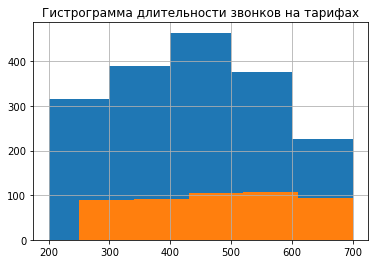

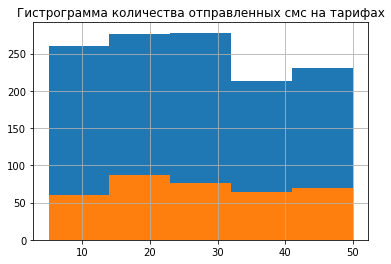

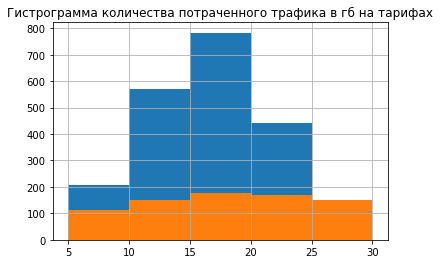

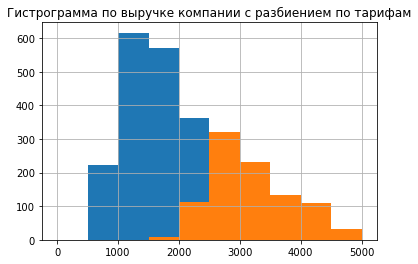

In [13]:
smart = total_group.query('tariff == "smart"')
ultra = total_group.query('tariff == "ultra"')

smart['duration'].hist(bins=5, range=(200, 700))
ultra['duration'].hist(bins=5, range=(250, 700))
plt.title('Гистрограмма длительности звонков на тарифах')
plt.show()

smart['sms'].hist(bins=5, range=(5, 50))
ultra['sms'].hist(bins=5, range=(5, 50))
plt.title('Гистрограмма количества отправленных смс на тарифах')
plt.show()

smart['gb'].hist(bins=5, range=(5, 30))
ultra['gb'].hist(bins=5, range=(5, 30))
plt.title('Гистрограмма количества потраченного трафика в гб на тарифах')
plt.show()

smart['proffit'].hist(range=(0, 5000))
ultra['proffit'].hist(range=(0, 5000))
plt.title('Гистрограмма по выручке компании с разбиением по тарифам')
plt.show()

### На тарифе смарт:
* Пользователям чаще всего необходимо 417±190 минут звонков в месяц (данные по расчету дисперсии,среднего и отклонения оказались точными)
* Пользователям чаще всего необходимо 33±28 смс в месяц (данные по расчету дисперсии,среднего и отклонения оказались верными)
* Пользователям чаще всего необходимо 16±5 гб в месяц (данные по расчету дисперсии,среднего и отклонения оказались точными)

### На тарифе ультра:
* Пользователям чаще всего необходимо 526±317 минут звонков в месяц (данные по расчету дисперсии,среднего и отклонения оказались точными)
* Пользователям чаще всего необходимо 25±10 смс в месяц (данные по расчету дисперсии,среднего и отклонения оказались неверными)
* Пользователям чаще всего необходимо 19±10 гб в месяц (данные по расчету дисперсии,среднего и отклонения оказались точными)

## Проверка гипотез

Нулевые гипотезы формировались по такому типу:
* Средние двух генеральных совокупностей для парных выборок равны между собой
Альтернативные гипотезы были сформированы по типу противоположности, т.е. :
* Скорее всего, средние двух генеральных совокупностей для парных выборок неравны между собой
H0 всегда говорит нам о том, что выборки равны и статистических изменений нет.

In [14]:
smart_p = smart['proffit']
ultra_p = ultra['proffit']

results = st.ttest_ind(smart_p, ultra_p)

alpha = .05
print('P- значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем гипотезу, что средняя выручка пользователей разных тарифов равна')
else:
    print('Не отвергаем гипотезу, что средняя выручка пользователей разных тарифов равна')

P- значение 0.0
Отвергаем гипотезу, что средняя выручка пользователей разных тарифов равна


In [15]:
print(total_group['city'].value_counts().head(10))

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
Ульяновск           83
Казань              77
Омск                72
Пермь               68
Самара              67
Name: city, dtype: int64


Посмотрели города, где больше всего пользователей, а значит это самые популярные города для оператора. Явно видно, после Ульяновска резко падает популярность оператора в городах, значит Казань уже не будем сравнивать с Москвой. Возьмем самые большие выборки для того, чтобы результаты были точнее.

In [16]:
moscow = total_group.query('city == "Москва"')
saint_p = total_group.query('city == "Санкт-Петербург"')
novosib = total_group.query('city == "Новосибирск"')
ufa = total_group.query('city == "Уфа"')
krasnodar = total_group.query('city == "Краснодар"')
ulyan = total_group.query('city == "Ульяновск"')

moscow_p = moscow['proffit']
saint_p_p = saint_p['proffit']
novosib_p = novosib['proffit']
ufa_p = ufa['proffit']
krasnodar_p = krasnodar['proffit']
ulyan_p = ulyan['proffit']

alpha = 0.05

results = st.ttest_ind(moscow_p, saint_p_p)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что средняя выручка в Москве равна Санкт-Петербургу')
else:
    print('Не отвергаем гипотезу от том, что средняя выручка в Москве равна Санкт-Петербургу')
print('---------------------------------------------------------------------------------------------')    
results = st.ttest_ind(moscow_p, novosib_p)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что средняя выручка в Москве равна Новосибирску')
else:
    print('Не отвергаем гипотезу от том, что средняя выручка в Москве равна Новосибирску')
print('---------------------------------------------------------------------------------------------')    
 
results = st.ttest_ind(moscow_p, ufa_p)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что средняя выручка в Москве равна Уфе')
else:
    print('Не отвергаем гипотезу от том, что средняя выручка в Москве равна Уфе')
print('---------------------------------------------------------------------------------------------')    

results = st.ttest_ind(moscow_p, krasnodar_p)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что средняя выручка в Москве равна Краснодару')
else:
    print('Не отвергаем гипотезу от том, что средняя выручка в Москве равна Краснодару')
print('---------------------------------------------------------------------------------------------')    

results = st.ttest_ind(moscow_p, ulyan_p)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что средняя выручка в Москве равна Ульяновску')
else:
    print('Не отвергаем гипотезу от том, что средняя выручка в Москве равна Ульяновску')

P- значение 0.23841200807386345
Не отвергаем гипотезу от том, что средняя выручка в Москве равна Санкт-Петербургу
---------------------------------------------------------------------------------------------
P- значение 0.0018475000870889207
Отвергаем гипотезу от том, что средняя выручка в Москве равна Новосибирску
---------------------------------------------------------------------------------------------
P- значение 0.5680019575790924
Не отвергаем гипотезу от том, что средняя выручка в Москве равна Уфе
---------------------------------------------------------------------------------------------
P- значение 0.10511036930770241
Не отвергаем гипотезу от том, что средняя выручка в Москве равна Краснодару
---------------------------------------------------------------------------------------------
P- значение 0.0320007989310625
Отвергаем гипотезу от том, что средняя выручка в Москве равна Ульяновску


In [17]:
all_regions = total_group.query('city != "Москва"')
all_regions_p = all_regions['proffit']

alpha = 0.05
results = st.ttest_ind(moscow_p, all_regions_p)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что средняя выручка в Москве равна выручке по остальным регионам')
else:
    print('Не отвергаем гипотезу от том, что средняя выручка в Москве равна выручке по остальным регионам')

P- значение 0.005806833070007075
Отвергаем гипотезу от том, что средняя выручка в Москве равна выручке по остальным регионам


## Общий вывод

* Мы сравнили выручки оператора по городам, поняли, что Москва - не единственный самый важный город для оператора, другие города тоже приносят много прибыли
* Средняя выручка пользователей разных тарифов также разная
-----------
* Большинству пользователей тарифа "смарт" хватает данных им минут, немногие готовы переплачивать сверх пакета
* Большинству пользователей тарифа "смарт" хватает данных им смс, немногие готовы переплачивать сверх пакета
* Большинству пользователей тарифа "смарт" не хватает данных им гб интернета, многие переплачивают, тратя в итоге по 16-18гб в месяц
-----------
* Большинству пользователей тарифа "ультра" хватает данных им минут, в основном, данных лимитов даже слишком много
* Большинству пользователей тарифа "ультра" хватает данных им смс, в основном, данных лимитов даже слишком много
* Большинство пользователей тарифа "ультра" укладывается в данный им лимит гб интернета, в основном. БОльшая часть пользователей не использует трафик по максимуму
-----------

Исходя из вышеизложенного, разумно ввести тариф, который будет учитывать пожелания смарта, но будет дешевле ультры. Данный тариф должен иметь в себе примерно 700мин, 50смс и 20-25гб. Это поможет завоевать аудиторию в тех городах, которые по выручке отличаются от Москвы.